# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews") 

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew London to Malaga on ...
1,✅ Trip Verified | I arrived at the airport ab...
2,"✅ Trip Verified | Filthy plane, cabin staff o..."
3,✅ Trip Verified | Chaos at Terminal 5 with B...
4,Not Verified | BA cancelled our flight and co...


In [5]:
df.to_csv("BA_reviews.csv")

In [6]:
df = pd.read_csv('BA_reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df.describe()

,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [8]:
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I flew London to Malaga on ...
1,1,✅ Trip Verified | I arrived at the airport ab...
2,2,"✅ Trip Verified | Filthy plane, cabin staff o..."
3,3,✅ Trip Verified | Chaos at Terminal 5 with B...
4,4,Not Verified | BA cancelled our flight and co...
...,...,...
995,995,✅ Trip Verified | Newcastle to Las Vegas via L...
996,996,✅ Trip Verified | While it is still fresh in ...
997,997,✅ Trip Verified | London to Philadelphia. I u...
998,998,✅ Trip Verified | Madrid to London. Good impro...


In [9]:
df.reviews = df.reviews.str.split('|', expand = True)[1]

In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
df.head()

,reviews
0,I flew London to Malaga on 27 August in Club...
1,I arrived at the airport about 2.5 hours bef...
2,"Filthy plane, cabin staff ok, appalling cust..."
3,Chaos at Terminal 5 with BA cancellations a...
4,BA cancelled our flight and could not book u...


In [12]:
df.keys()

Index(['reviews'], dtype='object')

## Cleaning the text

In [13]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...
1,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...
2,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...
3,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...
4,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...


In [14]:
import nltk

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [15]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [16]:
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
def token_stop_pos(text):
        tags = pos_tag(word_tokenize(text))
        newlist = []
        for word, tag in tags:
            if word.lower() not in set(stopwords.words('english')):
                newlist.append(tuple([word, pos_dict.get(tag[0])]))
                
        return newlist
                       
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,..."
1,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take..."
2,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[(Filthy, n), (plane, n), (cabin, n), (staff, ..."
3,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella..."
4,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,..."


In [18]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + "" + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos = pos)
            lemma_rew = lemma_rew + "" + lemma
        return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly
1,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take...",arrive
2,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[(Filthy, n), (plane, n), (cabin, n), (staff, ...",Filthy
3,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella...",Chaos
4,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,...",BA


In [19]:
df[['reviews', 'Lemma']]

,reviews,Lemma
0,I flew London to Malaga on 27 August in Club...,fly
1,I arrived at the airport about 2.5 hours bef...,arrive
2,"Filthy plane, cabin staff ok, appalling cust...",Filthy
3,Chaos at Terminal 5 with BA cancellations a...,Chaos
4,BA cancelled our flight and could not book u...,BA
...,...,...
995,Newcastle to Las Vegas via London. Both my fl...,Newcastle
996,"While it is still fresh in my mind, I’d like...",still
997,London to Philadelphia. I upgraded from coac...,London
998,Madrid to London. Good improvement. This BA c...,Madrid


In [20]:
#!pip install vaderSentiment

In [66]:
print(df.iloc[1,1])
df['reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df.iloc[0,1])

 I arrived at the airport about hours before takeoff to have more than about time to get checked in go through security etc All that went without any issues Being that I was relatively early at the gate I was one of the first passengers there After some time boarding had opened First the business class got called up then families with children and disabled people A couple minutes into the boarding they started to call up people one by one by name Then there was an announcement they won t let anyone in anymore Me and about fifty other people were still standing at the gate not being let in The reason they said was that the plane was short staffed Later I discovered speaking to a manager that not only the flight was short staffed but also it was overbooked After the announcement people were getting angry because they wouldn t be let in anymore Nothing changed and everyone was sent away I had a connecting flight later that day that I was going to miss because I was not let on the plane Fi

TypeError: expected string or bytes-like object, got 'list'

In [103]:
#!pip install textblob

In [67]:
from textblob import TextBlob

def polarity_calc(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def tag_cal(compound):
    if compound is None:
        return 'Neutral'
    elif compound > 0:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['polarity'] = df['reviews'].apply(lambda x: polarity_calc(str(x)))
df['tag'] = df['polarity'].apply(tag_cal)

print(df['polarity'])


0     -0.025521
1      0.048769
2     -0.125000
3     -0.072596
4     -0.131111
         ...   
995    0.342368
996    0.248929
997    0.073120
998    0.196759
999    0.078373
Name: polarity, Length: 1000, dtype: float64


In [68]:
tag = df['tag'].value_counts()
tag

Positive    648
Negative    341
Neutral      11
Name: tag, dtype: int64

In [69]:
df.to_csv("BA_reviews.csv")

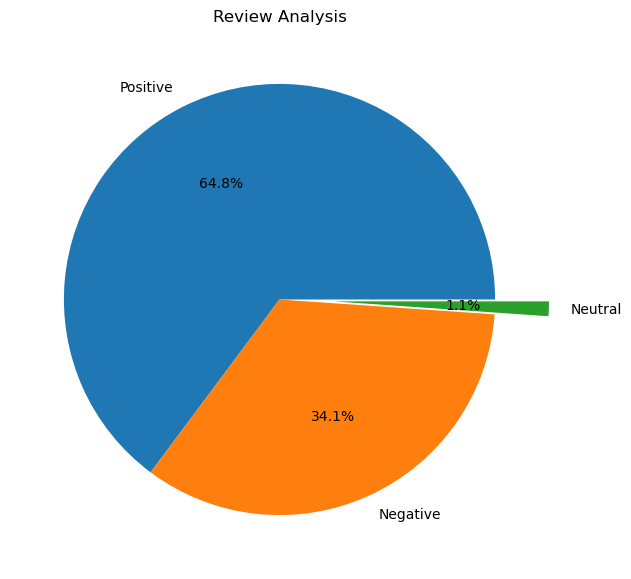

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,7))
plt.title("Review Analysis")
plt.pie(tag.values, labels = tag.index, explode = (0, 0, 0.25), autopct = '%1.1f%%')
plt.show()

In [72]:
    
review_word = []

for i in df['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

In [ ]:
#!pip install wordcloud

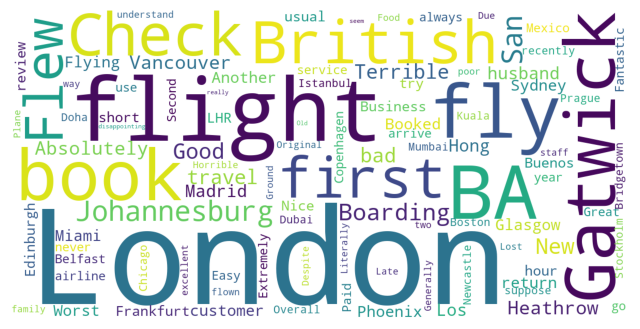

In [74]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords, max_words = 100,
        scale = 3, random_state = 1)
    
    wordcloud = wordcloud.generate(unique_string)
    
    fig = plt.figure(1, figsize = (8,8))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
    

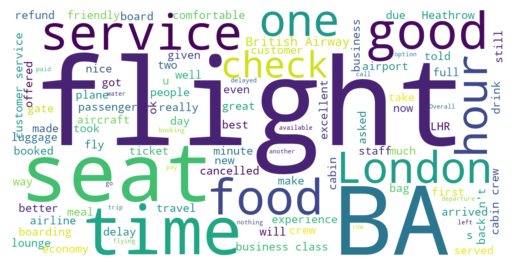

In [93]:
text = " "
for i in df.index:
    if df['tag'][i] == "Positive":
        text = text + ' '.join(df['reviews'][i])  # Join the tokens into a single string

wordcloud_positive = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    scale=3,
    random_state=1
)

wordcloud_positive.generate(text)  # Generate the WordCloud

# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()


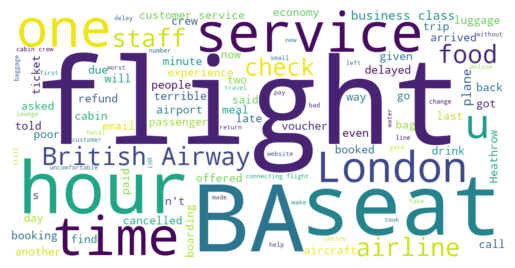

In [94]:
text2 = " "
for i in df.index:
    if df['tag'][i] == "Negative":
        text2 = text2 + ' '.join(df['reviews'][i])  # Join the tokens into a single string

wordcloud_Negative = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    scale=3,
    random_state=1
)

wordcloud_Negative.generate(text2)  # Generate the WordCloud

# Display the generated image:
plt.imshow(wordcloud_Negative, interpolation='bilinear')
plt.axis("off")
plt.show()


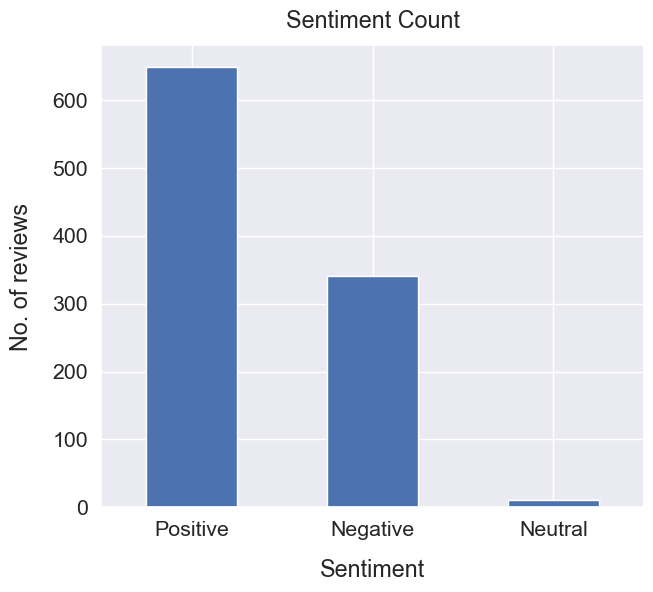

In [102]:
import seaborn as sns
df['tag'].value_counts().plot(kind = 'bar')
sns.set(font_scale = 1.4)
df['tag'].value_counts().plot(kind = 'bar', figsize = (7,6), rot = 0)
plt.xlabel('Sentiment', labelpad = 14)
plt.ylabel('No. of reviews', labelpad = 14)
plt.title('Sentiment Count', y = 1.02)
plt.show()

### Other method

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.2:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I flew London to Malaga on 27 August in Club...,I flew London to Malaga on August in Club Eur...,"[(flew, v), (London, n), (Malaga, n), (August,...",fly,0.0000,Neutral
1,I arrived at the airport about 2.5 hours bef...,I arrived at the airport about hours before t...,"[(arrived, v), (airport, n), (hours, n), (take...",arrive,0.0000,Neutral
2,"Filthy plane, cabin staff ok, appalling cust...",Filthy plane cabin staff ok appalling custome...,"[(Filthy, n), (plane, n), (cabin, n), (staff, ...",Filthy,0.0000,Neutral
3,Chaos at Terminal 5 with BA cancellations a...,Chaos at Terminal with BA cancellations and d...,"[(Chaos, n), (Terminal, n), (BA, n), (cancella...",Chaos,-0.5719,Negative
4,BA cancelled our flight and could not book u...,BA cancelled our flight and could not book us...,"[(BA, n), (cancelled, v), (flight, n), (could,...",BA,0.0000,Neutral
